In [1]:
# import all necessary library..
import numpy as np # for array calculations
import pandas as pd # for dataframe manipulations
import sqlite3 # sqlite3 database for storing data


# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for not write again and again to show the graph
%matplotlib inline

In [2]:
# Load dataframe
df = pd.read_csv('books.csv',error_bad_lines= False)
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
# creating a database and a table to store the data. 
conn = sqlite3.connect('Books_database')
c = conn.cursor()
c.execute('CREATE TABLE IF NOT EXISTS books (bookID, title, authors, average_rating, isbn, isbn13, language_code, num_pages, ratings_count, text_reviews_count,publication_date, publisher)')
conn.commit()

In [4]:
# exporting the dataframe data to the SQLite database.
df.to_sql('books', conn, if_exists='replace', index = False)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [ ]:
# Fetching data from Sqlite3 back to dataframe
conn = sqlite3.connect("Books_database")
dfback = pd.read_sql_query("SELECT * from books", conn)
print(dfback)

# Descriptive Analysis

In [3]:
# difffernt features..
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

## Features Description:
1. bookID Contains the unique ID for each book/series
2. title contains the titles of the books
3. authors contains the author of the particular book
4. average_rating the average rating of the books, as decided by the users
5. ISBN ISBN(10) number, tells the information about a book - such as edition and publisher
6. ISBN 13 The new format for ISBN, implemented in 2007. 13 digits
7. language_code Tells the language for the books
8. Num_pages Contains the number of pages for the book
9. Ratings_count Contains the number of ratings given for the book
10. text_reviews_count Has the count of reviews left by users

In [ ]:
# check null values..
df.isnull().sum()

There is no nan values in any of its attribute.

In [5]:
# about dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
#  numerical summary of dataframe 
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


# Visualization

### Top 15 Rated Books

In [7]:
top_fifteen = df[df['ratings_count'] > 1000000]
top_fifteen.sort_values(by='average_rating', ascending=False)
top_fifteen.head(15)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,5/1/1993,HarperCollins
294,890,Of Mice and Men,John Steinbeck,3.87,0142000671,9780142000670,eng,103,1755253,25554,1/8/2002,Penguin Books
299,930,Memoirs of a Geisha,Arthur Golden,4.11,0739326228,9780739326220,eng,434,1301083,19296,11/15/2005,Random House Large Print Publishing
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
310,968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,eng,489,1679706,35877,3/28/2006,Anchor
514,1618,The Curious Incident of the Dog in the Night-Time,Mark Haddon,3.88,1400032717,9781400032716,eng,226,1054308,35537,5/18/2004,Vintage


As we can see above the top 15 rated books. We see that the maximum rating in our dataframe is 5.0 but we dont see any books in the above result with 5.0 rating. This is because we filtered these books on the basis of the number of ratings. We made sure that all the books that we have in the above results have a decent amount of rating. There can be books in the data that can have only 1 or 2 ratings can be rated 5.0. We want to avoid such books hence this sort of filtering.

Let's go ahead and visualize this outcome in form of a graph.

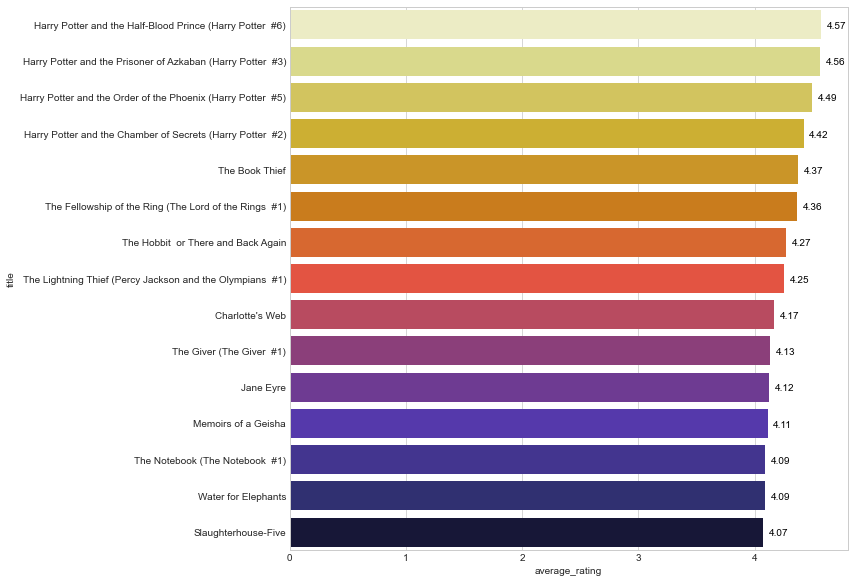

In [8]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))

data = top_fifteen.sort_values(by='average_rating', ascending=False).head(15)
gr = sns.barplot(x="average_rating", y="title", data=data, palette="CMRmap_r")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

### Top 15 authors present in our data

In [9]:
top_15_authors = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_index('authors')
top_15_authors.head(15)

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


Let's go ahead and take a look at some top 15 authors present in our data. We will rank them according to the number of books they have written provided these books are present in the data.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


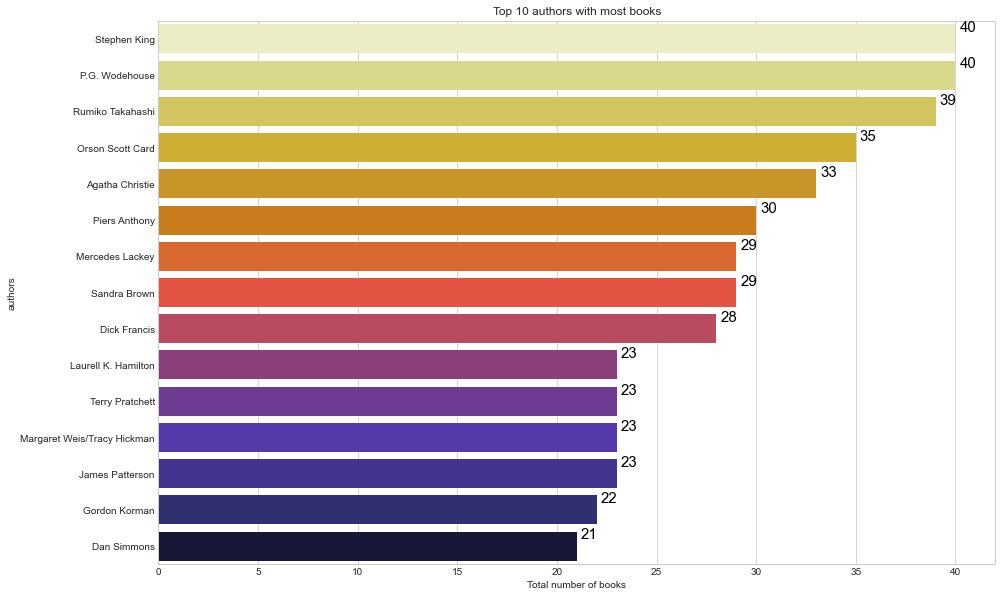

In [10]:
plt.figure(figsize=(15,10))
ax = sns.barplot(top_15_authors['title'], top_15_authors.index, palette='CMRmap_r')

ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

According to our graphs, Stephen king and P.G. Wodehouse have the most number of books in the data. Both the authors have 40 books in our data set followed by Rumiko Takahashi and Orson scott Card.

## Relationship between average rating and rating count

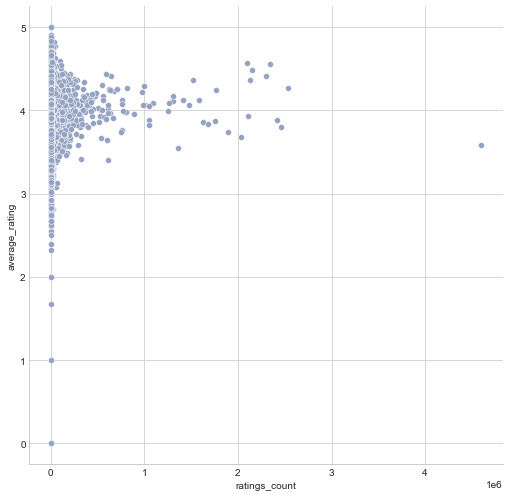

In [11]:
ax = sns.relplot(data=df,
                 x="ratings_count",
                 y="average_rating",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o')

## Language Distribution

As we can see here most of the books have the language as english. So, in the features selection section we colud remove non english rows in the dataframe for accuracy.

### Top 15 publisher

In [12]:
top_15_publisher = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_index('publisher')
top_15_publisher.head(15)

,title
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
HarperCollins,112
Harper Perennial,112
Pocket Books,111
Bantam,110


To get more about the publisher using visualizations

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


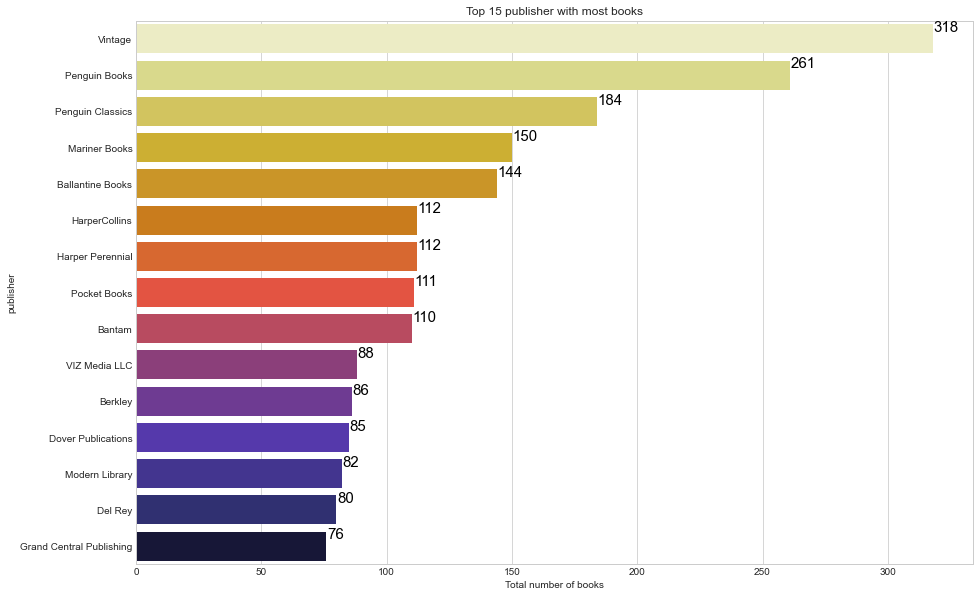

In [13]:
plt.figure(figsize=(15,10))
ax = sns.barplot(top_15_publisher['title'], top_15_publisher.index, palette='CMRmap_r')

ax.set_title("Top 15 publisher with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

## Distribution of average_rating

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

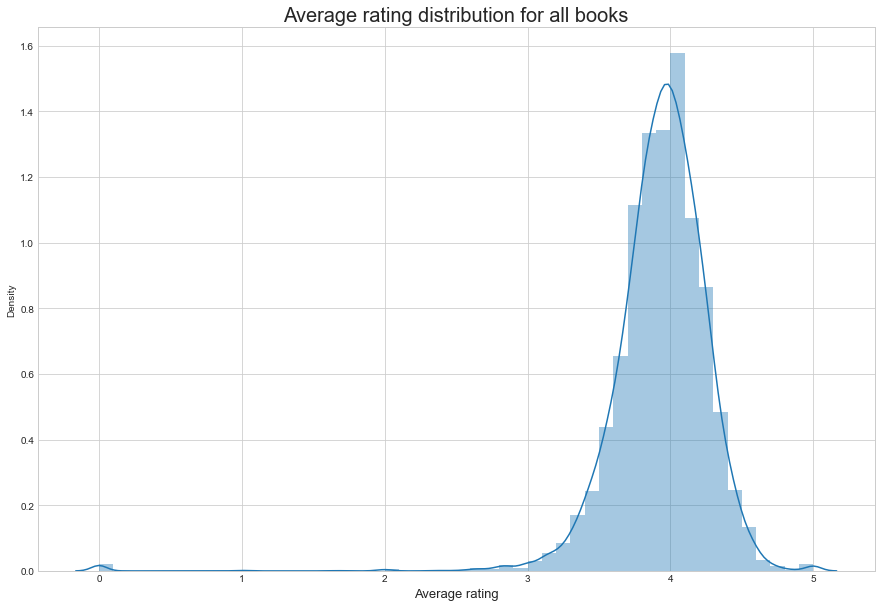

In [14]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

It almost follows gussian distributions curve. So, it is very good for model training.

After comparing the average rating with the different columns, we can go ahead with using the language and the Rating counts for our recommender system. Rest other colummns weren't making much sense and using them might not help us in a big way so we can omit them

# Feature Engineering

In [15]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

## 1. Imputation

In [16]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

In [17]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## 2. Handling Outliers

<AxesSubplot:>

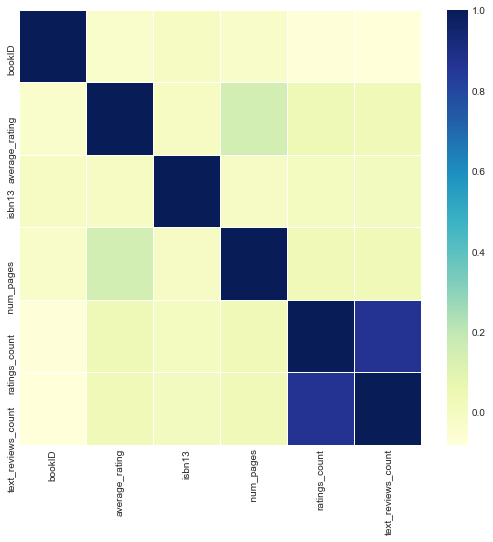

In [18]:
# correlation between the features
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

Here we can see that text_reviews_count is highly correlated with ratings_count. So, we can use either of these features.

In [19]:
df2 =df.copy()

We will now create a new column called 'rating_between'. We will divide our average rating column into various categories such as rating between 0 and 1, 1 and 2 and so on. This will work as one of the features that we will feed to our model so that it can make better predictions.

In [20]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [21]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [22]:
rating_df = pd.get_dummies(df2['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [23]:
l_code_df = pd.get_dummies(df2['language_code'])
l_code_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
## now we combine these two in the dataframe 

features = pd.concat([l_code_df, rating_df, df2['average_rating'], df2['ratings_count']], axis=1)
features.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,tur,wel,zho,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,average_rating,ratings_count
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.57,2095690
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.49,2153167
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.42,6333
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.56,2339585
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.78,41428


Now that we have our features ready, we will now use the Min-Max scaler to scale these values down. It will help in reducing the bias for some of the books that have too many features. It will basically find the median for all and equalize it,

# Model Building

In [25]:
# import necessary pakages for k-nearest-neighbour

from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [27]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [28]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
#     print('book_id', book_id)
    for newid in idlist[book_id]:
#         print(newid)
        book_list_name.append(df2.loc[newid].title)
#         print(new_data.loc[newid].title)
    return book_list_name

# Examples

## Example 1

Here we have a list of recommendations for the book 'Little Women'.

In [29]:
book_list_name = book_recommendation_engine('Little Women')
book_list_name

['Little Women',
 'Jane Eyre',
 'The Giver (The Giver  #1)',
 'Memoirs of a Geisha',
 "Charlotte's Web",
 'Water for Elephants']

## Example 2

Here we have a list of recommendations for the book 'The Lord of the Rings: Complete Visual Companion'.

In [30]:
book_list_name = book_recommendation_engine('The Lord of the Rings: Complete Visual Companion')
book_list_name

['The Lord of the Rings: Complete Visual Companion',
 'John Grisham Value Collection: A Time to Kill  The Firm  The Client',
 'The Diary of Virginia Woolf  Volume Five: 1936-1941',
 'The Lord of the Rings (The Lord of the Rings  #1-3)',
 'The Complete Pelican Shakespeare',
 'The Arden Shakespeare Complete Works']